In [4]:
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold

from xgboost import XGBClassifier

warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv("../input/processed_data.csv")
df.drop(columns=["cellid", "order_within_phase", "order"], inplace=True)
print(df.columns)

phase_dict = {
    "G1": 0,
    "S": 1,
    "G2M": 2,
}
df["phase"] = df["phase"].map(phase_dict)

X = df.drop(columns=["phase"])
y = df["phase"]

kfold = StratifiedKFold(n_splits=5)
accuracies = []

for fold, (train_index, test_index) in enumerate(kfold.split(X, y)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # scaler = StandardScaler()
    # X_train = scaler.fit_transform(X_train)
    # X_test = scaler.transform(X_test)

    clf = XGBClassifier(n_estimators=400, learning_rate=0.01,
                        max_depth=5, n_jobs=-1)
    clf.fit(X_train, y_train)
    preds = clf.predict(X_test)
    accuracy = accuracy_score(y_test, preds)
    accuracies.append(accuracy)
    print(f"Fold {fold + 1} accuracy: {accuracy}")

print(f"Mean accuracy: {np.mean(accuracies)}")

Index(['phase', '0', '0-50', '50-100', '100-150', '150-200', '200-250',
       '250-300', 'total_contacts', 'inter_ratio', 'intra_ratio', 'intra_0',
       'intra_0-50', 'intra_50-100', 'intra_100-150', 'intra_150-200',
       'intra_200-250', 'intra_250-300', 'short_range_ratio',
       'long_range_ratio', 'short_long_ratio'],
      dtype='object')
Fold 1 accuracy: 0.6777408637873754
Fold 2 accuracy: 0.7533333333333333
Fold 3 accuracy: 0.7433333333333333
Fold 4 accuracy: 0.7266666666666667
Fold 5 accuracy: 0.63
Mean accuracy: 0.7062148394241416


In [9]:
def plot_feature_importances(model):
    n_features = X.shape[1]
    feature_importances = model.feature_importances_
    sorted_idx = np.argsort(feature_importances)

    plt.figure(figsize=(8, 6))
    plt.barh(range(n_features),
             feature_importances[sorted_idx], align="center")
    plt.yticks(np.arange(n_features), X.columns[sorted_idx])
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.title("Feature Importances")
    plt.show()

    # Print feature names and their importance
    for idx in sorted_idx:
        print(f"{X.columns[idx]}: {feature_importances[idx]}")

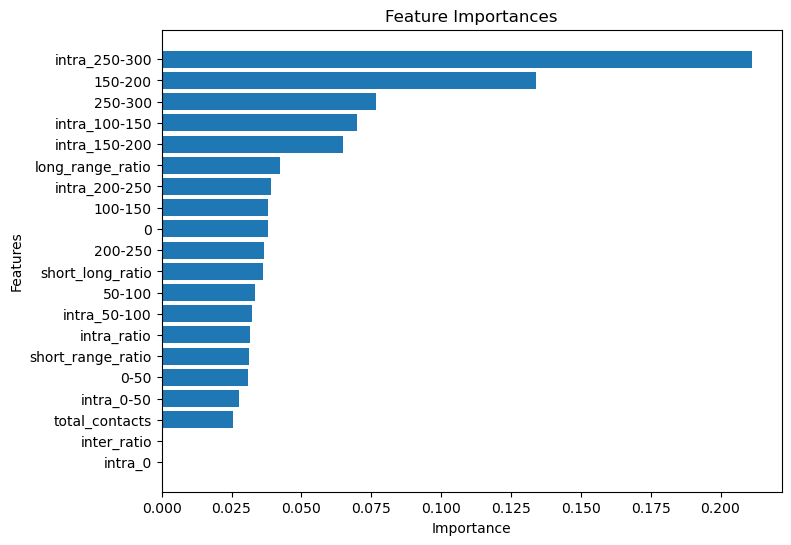

intra_0: 0.0
inter_ratio: 0.0
total_contacts: 0.0254078172147274
intra_0-50: 0.02784832753241062
0-50: 0.030997052788734436
short_range_ratio: 0.03126144781708717
intra_ratio: 0.031750764697790146
intra_50-100: 0.03227847069501877
50-100: 0.033399973064661026
short_long_ratio: 0.03617483377456665
200-250: 0.03658625856041908
0: 0.03792211413383484
100-150: 0.03813963755965233
intra_200-250: 0.03925931081175804
long_range_ratio: 0.042216215282678604
intra_150-200: 0.06482912600040436
intra_100-150: 0.06977472454309464
250-300: 0.07671652734279633
150-200: 0.13413211703300476
intra_250-300: 0.21130533516407013


In [10]:
plot_feature_importances(clf)